In [8]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error


def case_preprocessing():
    dataset = list()
    only_train_dataset = list()
    df = pd.DataFrame()
    train_df = pd.DataFrame()   # 새로운 Col 만들기 
    dir_path = 'C:\\Users\\gusrl\\opendrift\\drift_trajection'
    pastDir_path = 'C:\\Users\\gusrl\\opendrift\\drift_trajection\\Past_data'
    
    # hour, wind(바람의 x축,y축 방향 각각 제곱합의 루트), water(해류의 x축,y축 방향 각각 제곱합의 루트)
    for k in range(1,16):
        only_train_dataset.append(pd.read_csv(os.path.join(pastDir_path ,(str(k)+'.csv'))))
                                  
    # 2016 (case 7) (동해)
    dataset.append(pd.read_csv(os.path.join(dir_path,'2016_case_003.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2016_case_005.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2016_case_010.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2016_case_011.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2016_case_015.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2016_case_016.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2016_case_040.csv')))

    # 2018(case 12) (서해)
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_005.csv')))
    # dataset_list.append(pd.read_csv(os.path.join(dir_path,'2018_case_008.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_017.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_027.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_032.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_034.csv')))
    # dataset_list.append(pd.read_csv(os.path.join(dir_path,'2018_case_045.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_047.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_082.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_083.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_090.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_095.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2018_case_097.csv')))

    # 2019(case 4) (남해)
    dataset.append(pd.read_csv(os.path.join(dir_path,'2019_case_000.csv')))
#     dataset.append(pd.read_csv(os.path.join(dir_path,'2019_case_001.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2019_case_006.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2019_case_007.csv')))
    dataset.append(pd.read_csv(os.path.join(dir_path,'2019_case_005.csv')))
    
    # 과거데이터 전처리 
    for i in range(len(only_train_dataset)):
        # 동해 서해 남해 
        if i <8:
            only_train_dataset[i]['E'] = 0
            only_train_dataset[i]['W'] = 0
            only_train_dataset[i]['S'] = 1
        else:
            only_train_dataset[i]['E'] = 0
            only_train_dataset[i]['W'] = 1
            only_train_dataset[i]['S'] = 0
        
        # 시간처리를 위해 time의 object type -> datetime64로 변경
        only_train_dataset[i]['time'] = pd.to_datetime(only_train_dataset[i]['time'],format = '%Y-%m-%d %H:%M', errors = 'raise')
        # hour열 생성
        only_train_dataset[i]['hour'] = only_train_dataset[i]['time'].dt.hour
        # wind 열 생성
        only_train_dataset[i]['wind'] = (only_train_dataset[i]['wind_x']**2 + only_train_dataset[i]['wind_y']**2)**(1/2)
        # water열 생성
        only_train_dataset[i]['water'] = (only_train_dataset[i]['water_velocity_x']**2 + only_train_dataset[i]['water_velocity_y']**2)**(1/2)
        # diff_lon열 생성
        only_train_dataset[i]['diff_lon'] = only_train_dataset[i]['obs_x1_lon'].diff() 
        only_train_dataset[i]['diff_lon'][0] = 0
        # diff_lat열 생성
        only_train_dataset[i]['diff_lat'] = only_train_dataset[i]['obs_x1_lat'].diff()
        only_train_dataset[i]['diff_lat'][0] = 0
        # 'diff_wind_x'열 생성
        only_train_dataset[i]['diff_wind_x'] = only_train_dataset[i]['wind_x'].diff() 
        only_train_dataset[i]['diff_wind_x'][0] = 0
        # 'diff_wind_y'열 생성
        only_train_dataset[i]['diff_wind_y'] = only_train_dataset[i]['wind_y'].diff()
        only_train_dataset[i]['diff_wind_y'][0] = 0
        # 'diff_wind_x'열 생성
        only_train_dataset[i]['diff_water_velocity_x'] = only_train_dataset[i]['water_velocity_x'].diff() 
        only_train_dataset[i]['diff_water_velocity_x'][0] = 0
        # 'diff_wind_y'열 생성
        only_train_dataset[i]['diff_water_velocity_y'] = only_train_dataset[i]['water_velocity_y'].diff() 
        only_train_dataset[i]['diff_water_velocity_y'][0] = 0
        # 초기 이동 고려 (원-핫 인코딩)
        only_train_dataset[i]['initial'] = 0
        only_train_dataset[i]['not_initial'] = 0
        for j in range(0,10):
            only_train_dataset[i]['not_initial'][j] = 0
            only_train_dataset[i]['initial'][j] = 1
        
        # model_x2_lon
        # diff_lon열 생성
        only_train_dataset[i]['diff_mod_lon'] = only_train_dataset[i]['model_x2_lon'].diff() 
        only_train_dataset[i]['diff_mod_lon'][0] = 0
        # diff_lat열 생성
        only_train_dataset[i]['diff_mod_lat'] = only_train_dataset[i]['model_x2_lat'].diff()
        only_train_dataset[i]['diff_mod_lat'][0] = 0
        
        only_train_dataset[i]['water_velocity_x_10'] = only_train_dataset[i]['water_velocity_x'] * 10
        only_train_dataset[i]['water_velocity_y_10'] = only_train_dataset[i]['water_velocity_y'] * 10
        
        # diff열 생성
        only_train_dataset[i]['diff'] = (only_train_dataset[i]['diff_lon']**2 + only_train_dataset[i]['diff_lat']**2)**(1/2)
        
        # Null 값 제외
        
        only_train_dataset[i] = only_train_dataset[i].dropna()
        only_train_dataset[i] = only_train_dataset[i].reset_index(drop = True)
        
        
        # 초기좌표 (해역 나누기)
        only_train_dataset[i]['start_lon'] = only_train_dataset[i]['obs_x1_lon'][0]
        only_train_dataset[i]['start_lat'] = only_train_dataset[i]['obs_x1_lat'][0]
        
        # Smoothing (wind_x_ma, wind_y_ma, water_velocity_x_ma, water_velocity_y_ma 인자 추가) 
        only_train_dataset[i]['wind_x_ma'] = 0
        only_train_dataset[i]['wind_y_ma'] = 0
        only_train_dataset[i]['water_velocity_x_ma'] = 0
        only_train_dataset[i]['water_velocity_y_ma'] = 0 
        for j in range(1,len(only_train_dataset[i])-1):
            only_train_dataset[i]['wind_x_ma'][j] = (only_train_dataset[i]['wind_x'][j-1] + only_train_dataset[i]['wind_x'][j] + only_train_dataset[i]['wind_x'][j+1])/3
            only_train_dataset[i]['wind_y_ma'][j] = (only_train_dataset[i]['wind_y'][j-1] + only_train_dataset[i]['wind_y'][j] + only_train_dataset[i]['wind_y'][j+1])/3
            only_train_dataset[i]['water_velocity_x_ma'][j] = (only_train_dataset[i]['water_velocity_x'][j-1] + only_train_dataset[i]['water_velocity_x'][j] + only_train_dataset[i]['water_velocity_x'][j+1])/3
            only_train_dataset[i]['water_velocity_y_ma'][j] = (only_train_dataset[i]['water_velocity_y'][j-1] + only_train_dataset[i]['water_velocity_y'][j] + only_train_dataset[i]['water_velocity_y'][j+1])/3    
        df = only_train_dataset[i]
        indices = df.query('wind_x < -90 or wind_y < -90 or water_velocity_x < -90 or water_velocity_y < -90').index
        df.drop(indices, inplace=True)
        df.reset_index(drop = True, inplace=True)
        only_train_dataset[i] = df 
        
     # 기상청 데이터 전처리 
    for i in range(len(dataset)):
        # 동해 서해 남해 
        if i <7:
            dataset[i]['E'] = 1
            dataset[i]['W'] = 0
            dataset[i]['S'] = 0
        elif i >= 7 and i<18:
            dataset[i]['E'] = 0
            dataset[i]['W'] = 1
            dataset[i]['S'] = 0
        else:
            dataset[i]['E'] = 0
            dataset[i]['W'] = 0
            dataset[i]['S'] = 1
        
        # 시간처리를 위해 time의 object type -> datetime64로 변경
        dataset[i]['time'] = pd.to_datetime(dataset[i]['time'],format = '%Y-%m-%d %H:%M', errors = 'raise')
        # hour열 생성
        dataset[i]['hour'] = dataset[i]['time'].dt.hour
        # wind 열 생성
        dataset[i]['wind'] = (dataset[i]['wind_x']**2 + dataset[i]['wind_y']**2)**(1/2)
        # water열 생성
        dataset[i]['water'] = (dataset[i]['water_velocity_x']**2 + dataset[i]['water_velocity_y']**2)**(1/2)
        # diff_lon열 생성
        dataset[i]['diff_lon'] = dataset[i]['obs_x1_lon'].diff() 
        dataset[i]['diff_lon'][0] = 0
        # diff_lat열 생성
        dataset[i]['diff_lat'] = dataset[i]['obs_x1_lat'].diff()
        dataset[i]['diff_lat'][0] = 0
        # 'diff_wind_x'열 생성
        dataset[i]['diff_wind_x'] = dataset[i]['wind_x'].diff() 
        dataset[i]['diff_wind_x'][0] = 0
        # 'diff_wind_y'열 생성
        dataset[i]['diff_wind_y'] = dataset[i]['wind_y'].diff()
        dataset[i]['diff_wind_y'][0] = 0
        # 'diff_wind_x'열 생성
        dataset[i]['diff_water_velocity_x'] = dataset[i]['water_velocity_x'].diff() 
        dataset[i]['diff_water_velocity_x'][0] = 0
        # 'diff_wind_y'열 생성
        dataset[i]['diff_water_velocity_y'] = dataset[i]['water_velocity_y'].diff() 
        dataset[i]['diff_water_velocity_y'][0] = 0
        
        # 초기 이동 고려 (원-핫 인코딩)
        dataset[i]['initial'] = 0
        dataset[i]['not_initial'] = 1
        for j in range(0,30):
            dataset[i]['not_initial'][j] = 0
            dataset[i]['initial'][j] = 1
        
        # diff열 생성
        dataset[i]['diff'] = (dataset[i]['diff_lon']**2 + dataset[i]['diff_lat']**2)**(1/2)
        
        dataset[i]['diff_mod_lon'] = dataset[i]['model_x2_lon'].diff() 
        dataset[i]['diff_mod_lon'][0] = 0
        
        # diff_lat열 생성
        dataset[i]['diff_mod_lat'] = dataset[i]['model_x2_lat'].diff()
        dataset[i]['diff_mod_lat'][0] = 0
        
        # mod diff 
        dataset[i]['diff_mod'] = (dataset[i]['diff_mod_lon']**2 + dataset[i]['diff_mod_lat']**2)**(1/2)
        
        # Null 값 제외
        dataset[i] = dataset[i].dropna()
        dataset[i] = dataset[i].reset_index(drop = True)
        
        # 초기좌표 (해역 나누기)
        dataset[i]['start_lon'] = dataset[i]['obs_x1_lon'][0]
        dataset[i]['start_lat'] = dataset[i]['obs_x1_lat'][0]
        
        # Smoothing (wind_x_ma, wind_y_ma, water_velocity_x_ma, water_velocity_y_ma 인자 추가) 
        dataset[i]['wind_x_ma'] = 0
        dataset[i]['wind_y_ma'] = 0
        dataset[i]['water_velocity_x_ma'] = 0
        dataset[i]['water_velocity_y_ma'] = 0 
        for j in range(1,len(dataset[i])-1):
            dataset[i]['wind_x_ma'][j] = (dataset[i]['wind_x'][j-1] + dataset[i]['wind_x'][j] + dataset[i]['wind_x'][j+1])/3
            dataset[i]['wind_y_ma'][j] = (dataset[i]['wind_y'][j-1] + dataset[i]['wind_y'][j] + dataset[i]['wind_y'][j+1])/3
            dataset[i]['water_velocity_x_ma'][j] = (dataset[i]['water_velocity_x'][j-1] + dataset[i]['water_velocity_x'][j] + dataset[i]['water_velocity_x'][j+1])/3
            dataset[i]['water_velocity_y_ma'][j] = (dataset[i]['water_velocity_y'][j-1] + dataset[i]['water_velocity_y'][j] + dataset[i]['water_velocity_y'][j+1])/3
        
        # 삭제 전 원본 df
        df = pd.concat([df,dataset[i]],ignore_index = True)
        # 불필요열 삭제 
        pre_df = dataset[i].drop(columns = ['time','obs_x1_lon','obs_x1_lat','model_x2_lon','model_x2_lat'])  
        train_df = pd.concat([train_df, pre_df[1:-1]],ignore_index = True)
        
    df = df.reset_index(drop = True)
    train_df = train_df.reset_index(drop = True)
    return dataset, df, train_df, only_train_dataset

def drift_mae(y, predict_y):
    mae = mean_absolute_error(y, predict_y)
    return mae


def n2_mae(y, predict_y):
    n = y.shape[0]
    error_sum = 0
    
    for i in range(n):
        error_sum += abs((y[i][0] - predict_y[i][0])) + abs(( y[i][1] - predict_y[i][1]))
    
    mae = error_sum/(2*n)   
    
    return mae


def paper_mae(y, predict_y): # 논문  
    n = y.shape[0]
    error_sum = 0
    
    for i in range(n):
        error_sum += abs(y[i][0] - predict_y[i][0]) + abs(y[i][1] - predict_y[i][1])
    
    mae = error_sum/n    
    return mae

def NCLS_score(y, predict_y): # 1시간 
        # dl_i 구하기 
        dl_list, dl_sum, o_sum = list(), list(), 0
        n = y.shape[0]
        for i in range(1, n):
            # 위도 1도는 111.321, 경도 1도는 87.74km, 단위 km
            d_lon = y[i][0] - y[i-1][0]  
            d_lat = y[i][1] - y[i-1][1]
            # 거리 구하기
            point_distance = np.sqrt(np.power(d_lon,2) + np.power(d_lat,2))
            dl_list.append(point_distance)
            
        for i in range(len(dl_list)):
            temp = 0
            for j in range(i+1):
                temp += dl_list[j]
            dl_sum.append(temp)

        for i in range(len(dl_sum)):
            o_sum += dl_sum[i]
        
        # 예측모델의 d_i 구하기
        d_list = list()
        for i in range(1,n):
            # 위도 1도는 111.321 # 경도 1도는 55.802km
            d_lon = y[i][0] - predict_y[i][0]  
            d_lat = y[i][1] - predict_y[i][1]
            # 거리 구하기
            point_distance = np.sqrt(np.power(d_lon,2) + np.power(d_lat,2))
            d_list.append(point_distance)

        # s 구하기
        d_sum, s, ss_score = 0, 0, 0

        for i in range(len(d_list)):
            d_sum += d_list[i]

        s = d_sum/o_sum
        
        if s > 1:
                ss_score = 0
        else:
            ss_score = 1-s
        
        return ss_score

def drift_trajection_show(index, y_pred): 
    %matplotlib inline

    # 실제 위치
    lon = dataset[index]['obs_x1_lon']
    lon = np.array(lon)
    lat = dataset[index]['obs_x1_lat']
    lat = np.array(lat)
    
    # baseline
    baseline_lon = dataset[index]['model_x2_lon']
    baseline_lon = np.array(baseline_lon)
    baseline_lat = dataset[index]['model_x2_lat']
    baseline_lat = np.array(baseline_lat)

    # 예측값 
    first_lon = lon[0]
    first_lat = lat[0]
    lon_pred = np.zeros((y_pred.shape[0]+1,))
    lat_pred = np.zeros((y_pred.shape[0]+1,))
    lon_pred[0] = first_lon 
    lat_pred[0] = first_lat
    
    for i in range(1, lon_pred.shape[0]):
        lon_pred[i] = lon_pred[i-1] + y_pred[i-1][0]
        lat_pred[i] = lat_pred[i-1] + y_pred[i-1][1]
        
    return lon, lat, baseline_lon, baseline_lat, lon_pred, lat_pred

def std_scaler(train_X, test_X):
    from sklearn.preprocessing import StandardScaler
    std = StandardScaler()
    std.fit(train_X)
    train_X_scaled = std.transform(train_X)
    test_X_scaled = std.transform(test_X)
    return train_X_scaled, test_X_scaled

def MinMax_scaler(train_X, test_X):
    from sklearn.preprocessing import MinMaxScaler
    mms = MinMaxScaler()
    mms.fit(train_X)
    train_X_scaled = mms.transform(train_X)
    test_X_scaled = mms.transform(test_X)
    return train_X_scaled, test_X_scaled
    
def roburst_scaler(train_X, test_X):
    from sklearn.preprocessing import RobustScaler
    rbs = RobustScaler()
    train_X_scaled = rbs.fit_transform(train_X)
    test_X_scaled = rbs.transform(test_X)
    return train_X_scaled, test_X_scaled


def maxAbsScaler(train_X, test_X):

    from sklearn.preprocessing import MaxAbsScaler
    maxAbsScaler = MaxAbsScaler()
    train_X_scaled = maxAbsScaler.fit_transform(train_X)
    test_X_scaled = maxAbsScaler.transform(test_X)
    return train_X_scaled, test_X_scaled

In [9]:
dataset, concat_df, train_df, only_train_dataset = case_preprocessing()

C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_dataset[i]['diff_lon'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_dataset[i]['diff_lat'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_data

C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_dataset[i]['diff_lon'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_dataset[i]['diff_lat'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_data

C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_dataset[i]['wind_x_ma'][j] = (only_train_dataset[i]['wind_x'][j-1] + only_train_dataset[i]['wind_x'][j] + only_train_dataset[i]['wind_x'][j+1])/3
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_dataset[i]['wind_y_ma'][j] = (only_train_dataset[i]['wind_y'][j-1] + only_train_dataset[i]['wind_y'][j] + only_train_dataset[i]['wind_y'][j+1])/3
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:135: SettingWithCo

C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_dataset[i]['wind_x_ma'][j] = (only_train_dataset[i]['wind_x'][j-1] + only_train_dataset[i]['wind_x'][j] + only_train_dataset[i]['wind_x'][j+1])/3
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_train_dataset[i]['wind_y_ma'][j] = (only_train_dataset[i]['wind_y'][j-1] + only_train_dataset[i]['wind_y'][j] + only_train_dataset[i]['wind_y'][j+1])/3
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:135: SettingWithCo

C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['diff_mod_lon'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['diff_mod_lat'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['wind_x_ma'][j]

C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['wind_x_ma'][j] = (dataset[i]['wind_x'][j-1] + dataset[i]['wind_x'][j] + dataset[i]['wind_x'][j+1])/3
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['wind_y_ma'][j] = (dataset[i]['wind_y'][j-1] + dataset[i]['wind_y'][j] + dataset[i]['wind_y'][j+1])/3
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['diff_mod_lon'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['diff_mod_lat'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['wind_x_ma'][j]

C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['diff_lon'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['diff_lat'][0] = 0
C:\Users\gusrl\AppData\Local\Temp\ipykernel_10008\3804631199.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i]['diff_wind_x'][0] = 0
C

In [23]:
from tensorflow.keras.models import Model
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
          Dense(units = latent_dim, input_dim = 6, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          Dense(6, activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [27]:
latent_dim = 5 
X = dataset[0][['wind_x', 'water_velocity_x', 'wind_y', 'water_velocity_y','diff_lon','diff_lat']].to_numpy()

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X,X,
                epochs=10000,
                shuffle=True)

Epoch 1/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.5240
Epoch 2/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.5055
Epoch 3/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.4862
Epoch 4/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.4673
Epoch 5/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.4485
Epoch 6/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.4287
Epoch 7/10000
3/3 [==============================] - 0s 1ms/step - loss: 9.4095
Epoch 8/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.3890
Epoch 9/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.3687
Epoch 10/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.3466
Epoch 11/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.3253
Epoch 12/10000
3/3 [==============================] - 0s 2ms/step - loss: 9.3028
Epoch 13/10000
3/3 [=================

3/3 [==============================] - 0s 2ms/step - loss: 8.0311
Epoch 103/10000
3/3 [==============================] - 0s 1ms/step - loss: 8.0282
Epoch 104/10000
3/3 [==============================] - 0s 2ms/step - loss: 8.0254
Epoch 105/10000
3/3 [==============================] - 0s 2ms/step - loss: 8.0227
Epoch 106/10000
3/3 [==============================] - 0s 1ms/step - loss: 8.0199
Epoch 107/10000
3/3 [==============================] - 0s 2ms/step - loss: 8.0174
Epoch 108/10000
3/3 [==============================] - 0s 2ms/step - loss: 8.0149
Epoch 109/10000
3/3 [==============================] - 0s 2ms/step - loss: 8.0124
Epoch 110/10000
3/3 [==============================] - 0s 1ms/step - loss: 8.0101
Epoch 111/10000
3/3 [==============================] - 0s 2ms/step - loss: 8.0077
Epoch 112/10000
3/3 [==============================] - 0s 2ms/step - loss: 8.0054
Epoch 113/10000
3/3 [==============================] - 0s 1ms/step - loss: 8.0032
Epoch 114/10000
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 7.9084
Epoch 203/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.9079
Epoch 204/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.9074
Epoch 205/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.9069
Epoch 206/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.9064
Epoch 207/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.9059
Epoch 208/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.9055
Epoch 209/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.9050
Epoch 210/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.9045
Epoch 211/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.9040
Epoch 212/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.9035
Epoch 213/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.9031
Epoch 214/10000
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 7.8753
Epoch 303/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8751
Epoch 304/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8749
Epoch 305/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8747
Epoch 306/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8745
Epoch 307/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8743
Epoch 308/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8741
Epoch 309/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8739
Epoch 310/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8737
Epoch 311/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8735
Epoch 312/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8733
Epoch 313/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8731
Epoch 314/10000
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 7.8606
Epoch 403/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8605
Epoch 404/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8604
Epoch 405/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8603
Epoch 406/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8602
Epoch 407/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8601
Epoch 408/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8600
Epoch 409/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8599
Epoch 410/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8598
Epoch 411/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8597
Epoch 412/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8596
Epoch 413/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8595
Epoch 414/10000
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 7.8527
Epoch 503/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8527
Epoch 504/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8526
Epoch 505/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8526
Epoch 506/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8525
Epoch 507/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8524
Epoch 508/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8524
Epoch 509/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8523
Epoch 510/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8523
Epoch 511/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8522
Epoch 512/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8522
Epoch 513/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8521
Epoch 514/10000
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 7.8480
Epoch 603/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8480
Epoch 604/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8479
Epoch 605/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8479
Epoch 606/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8479
Epoch 607/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8478
Epoch 608/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8478
Epoch 609/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8478
Epoch 610/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8477
Epoch 611/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8477
Epoch 612/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8477
Epoch 613/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8476
Epoch 614/10000
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 7.8450
Epoch 703/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8450
Epoch 704/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8449
Epoch 705/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8449
Epoch 706/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8449
Epoch 707/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8449
Epoch 708/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8448
Epoch 709/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8448
Epoch 710/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8448
Epoch 711/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8448
Epoch 712/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8447
Epoch 713/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8447
Epoch 714/10000
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 7.8429
Epoch 803/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8429
Epoch 804/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8429
Epoch 805/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8429
Epoch 806/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8429
Epoch 807/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8428
Epoch 808/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8428
Epoch 809/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8428
Epoch 810/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8428
Epoch 811/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8428
Epoch 812/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8427
Epoch 813/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8427
Epoch 814/10000
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 7.8414
Epoch 903/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8414
Epoch 904/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8414
Epoch 905/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8413
Epoch 906/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8413
Epoch 907/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8413
Epoch 908/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8413
Epoch 909/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8413
Epoch 910/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8413
Epoch 911/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8413
Epoch 912/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8413
Epoch 913/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8412
Epoch 914/10000
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 7.8402
Epoch 1003/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8402
Epoch 1004/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8402
Epoch 1005/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8402
Epoch 1006/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8402
Epoch 1007/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8402
Epoch 1008/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8402
Epoch 1009/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8402
Epoch 1010/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8402
Epoch 1011/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8402
Epoch 1012/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8401
Epoch 1013/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8401
Epoch 1014/10000
3/3 

3/3 [==============================] - 0s 1ms/step - loss: 7.8394
Epoch 1101/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8394
Epoch 1102/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8394
Epoch 1103/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8394
Epoch 1104/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8393
Epoch 1105/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8393
Epoch 1106/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8393
Epoch 1107/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8393
Epoch 1108/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8393
Epoch 1109/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8393
Epoch 1110/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8393
Epoch 1111/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8393
Epoch 1112/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1199/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1200/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8387
Epoch 1201/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1202/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1203/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1204/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1205/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1206/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1207/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1208/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8387
Epoch 1209/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8386
Epoch 1210/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1297/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1298/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1299/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1300/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1301/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1302/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1303/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8381
Epoch 1304/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1305/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1306/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1307/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8381
Epoch 1308/10000
3/3 

3/3 [==============================] - 0s 1ms/step - loss: 7.8377
Epoch 1395/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8377
Epoch 1396/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8377
Epoch 1397/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8377
Epoch 1398/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8377
Epoch 1399/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8377
Epoch 1400/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8377
Epoch 1401/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8377
Epoch 1402/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8377
Epoch 1403/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8377
Epoch 1404/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8377
Epoch 1405/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8376
Epoch 1406/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1493/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8373
Epoch 1494/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1495/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8373
Epoch 1496/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1497/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1498/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1499/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1500/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1501/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1502/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1503/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8373
Epoch 1504/10000
3/3 

3/3 [==============================] - 0s 1ms/step - loss: 7.8370
Epoch 1591/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8370
Epoch 1592/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8370
Epoch 1593/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8370
Epoch 1594/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8370
Epoch 1595/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8370
Epoch 1596/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8370
Epoch 1597/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8370
Epoch 1598/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8370
Epoch 1599/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8370
Epoch 1600/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8370
Epoch 1601/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8370
Epoch 1602/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1689/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1690/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1691/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1692/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1693/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1694/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8367
Epoch 1695/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1696/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1697/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1698/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8367
Epoch 1699/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8367
Epoch 1700/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1787/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1788/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1789/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1790/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1791/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1792/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1793/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8365
Epoch 1794/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1795/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1796/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8365
Epoch 1797/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8365
Epoch 1798/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8363
Epoch 1885/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8363
Epoch 1886/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8363
Epoch 1887/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8363
Epoch 1888/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8363
Epoch 1889/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8363
Epoch 1890/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8363
Epoch 1891/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8363
Epoch 1892/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8363
Epoch 1893/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8363
Epoch 1894/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8363
Epoch 1895/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8363
Epoch 1896/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1983/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1984/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8362
Epoch 1985/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1986/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1987/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1988/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1989/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1990/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1991/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1992/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1993/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8362
Epoch 1994/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2081/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2082/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2083/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2084/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2085/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2086/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2087/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8361
Epoch 2088/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2089/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2090/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2091/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8361
Epoch 2092/10000
3/3 

3/3 [==============================] - 0s 1ms/step - loss: 7.8360
Epoch 2179/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8360
Epoch 2180/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8360
Epoch 2181/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8360
Epoch 2182/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8360
Epoch 2183/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8360
Epoch 2184/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8360
Epoch 2185/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8360
Epoch 2186/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8360
Epoch 2187/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8360
Epoch 2188/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8360
Epoch 2189/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8360
Epoch 2190/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2277/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2278/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2279/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8359
Epoch 2280/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2281/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2282/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2283/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2284/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2285/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2286/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2287/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8359
Epoch 2288/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2375/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2376/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2377/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2378/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2379/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2380/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2381/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2382/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2383/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2384/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2385/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8358
Epoch 2386/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2473/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8358
Epoch 2474/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2475/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2476/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2477/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2478/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2479/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2480/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2481/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8358
Epoch 2482/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8358
Epoch 2483/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8358
Epoch 2484/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2571/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2572/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8357
Epoch 2573/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8357
Epoch 2574/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2575/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8357
Epoch 2576/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2577/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8357
Epoch 2578/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2579/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2580/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2581/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2582/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2669/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2670/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2671/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2672/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2673/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2674/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2675/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2676/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8357
Epoch 2677/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2678/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2679/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2680/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2767/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2768/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2769/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2770/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2771/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2772/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2773/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2774/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2775/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2776/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2777/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8357
Epoch 2778/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2865/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2866/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2867/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2868/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2869/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8356
Epoch 2870/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2871/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2872/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2873/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2874/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2875/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2876/10000
3/3 

3/3 [==============================] - 0s 1ms/step - loss: 7.8356
Epoch 2963/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2964/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8356
Epoch 2965/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2966/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2967/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2968/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8356
Epoch 2969/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8356
Epoch 2970/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2971/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2972/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2973/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 2974/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3061/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3062/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3063/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3064/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3065/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8356
Epoch 3066/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3067/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8356
Epoch 3068/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3069/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3070/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3071/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3072/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3159/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8356
Epoch 3160/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8356
Epoch 3161/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8356
Epoch 3162/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8356
Epoch 3163/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3164/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3165/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3166/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8356
Epoch 3167/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3168/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3169/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8356
Epoch 3170/10000
3/3 

3/3 [==============================] - 0s 2ms/step - loss: 7.8355
Epoch 3257/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8355
Epoch 3258/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8355
Epoch 3259/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8355
Epoch 3260/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8355
Epoch 3261/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8355
Epoch 3262/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8355
Epoch 3263/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8355
Epoch 3264/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.8355
Epoch 3265/10000
3/3 [==============================] - 0s 1ms/step - loss: 7.8355
Epoch 3266/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.8355
Epoch 3267/10000
3/3 [==============================] - 0s 2ms/step - loss: 7.8355
Epoch 3268/10000
3/3 

KeyboardInterrupt: 

Epoch 1/100
93/93 [==============================] - 0s 984us/step - loss: 7.9638
Epoch 2/100
93/93 [==============================] - 0s 978us/step - loss: 7.6803
Epoch 3/100
93/93 [==============================] - 0s 963us/step - loss: 7.4579
Epoch 4/100
93/93 [==============================] - 0s 971us/step - loss: 7.3000
Epoch 5/100
93/93 [==============================] - 0s 963us/step - loss: 7.1964
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 7.1306
Epoch 7/100
93/93 [==============================] - 0s 1ms/step - loss: 7.0920
Epoch 8/100
93/93 [==============================] - 0s 1ms/step - loss: 7.0690
Epoch 9/100
93/93 [==============================] - 0s 1ms/step - loss: 7.0544
Epoch 10/100
93/93 [==============================] - 0s 1ms/step - loss: 7.0444
Epoch 11/100
93/93 [==============================] - 0s 995us/step - loss: 7.0371
Epoch 12/100
93/93 [==============================] - 0s 958us/step - loss: 7.0317
Epoch 13/100
93/93 [===

93/93 [==============================] - 0s 990us/step - loss: 6.9957
1.4082112910626543


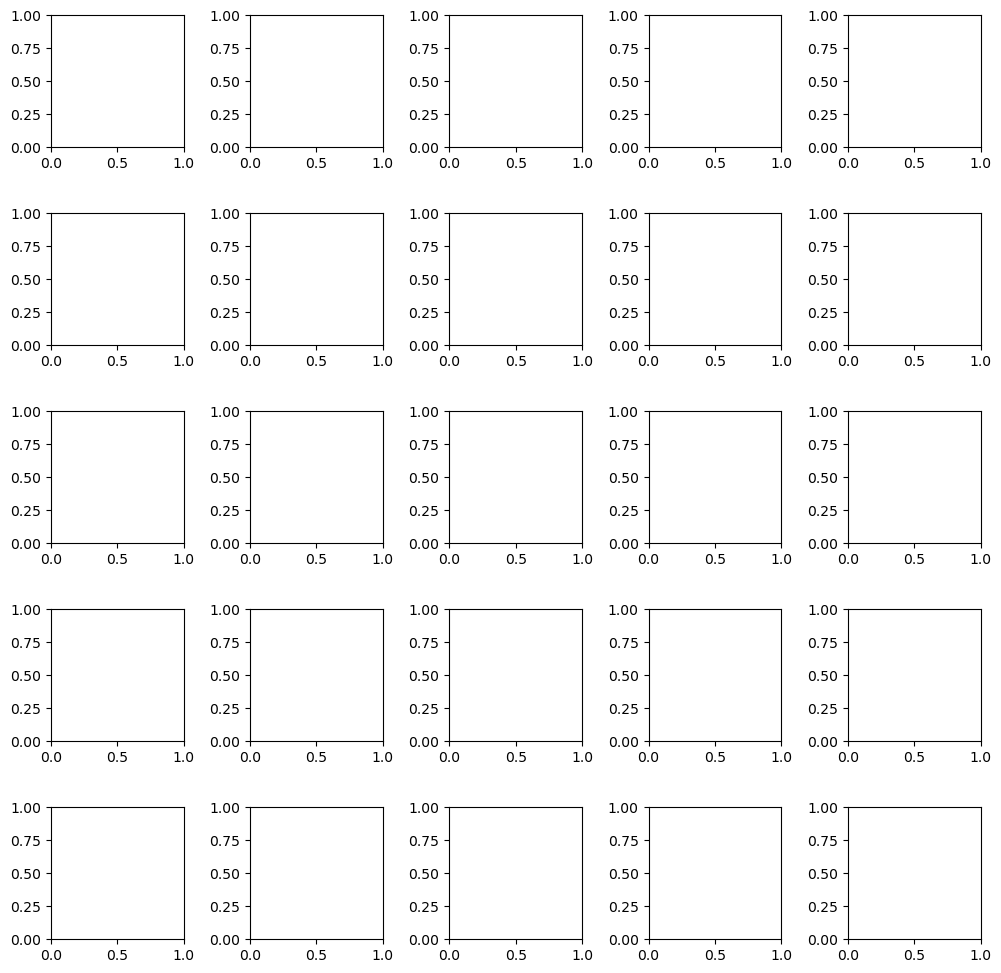

In [34]:
f, axes = plt.subplots(5, 5)
# 격자 크기 설정
f.set_size_inches((12, 12))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
baseline_MAE_list = list() 
baseline_NCLS_list = list()
MAE_list = list()
NCLS_list = list()
test_case_list = list()

for i in range(1):
    # train dataset
    train_X = pd.DataFrame()
    train_y = np.array([[]])
    train = dataset[0:i] + dataset[i+1:len(dataset)]
    
    AE_X = train[0][['wind_x', 'water_velocity_x', 'wind_y', 'water_velocity_y','diff_lon', 'diff_lat']]
    train_X = train[0][['wind_x', 'water_velocity_x', 'wind_y', 'water_velocity_y','diff']]
    train_y = train[0][['diff_lon', 'diff_lat']]
    # 첫 행은 훈련에서 제외
    AE_X = AE_X[1:]
    train_X = train_X[1:]
    train_y = train_y[1:].to_numpy()
    
    for j in range(1,len(train)):
        add = train[j][['wind_x', 'water_velocity_x', 'wind_y', 'water_velocity_y','diff_lon', 'diff_lat']]
        trina_xi = train[j][['wind_x', 'water_velocity_x', 'wind_y', 'water_velocity_y','diff']] 
        trina_yi = train[j][['diff_lon', 'diff_lat']]
        
        add = add[1:]
        trina_xi = trina_xi[1:]
        trina_yi = trina_yi[1:].to_numpy()
        
        AE_X = pd.concat([AE_X,add],ignore_index = True)
        train_X = pd.concat([train_X,trina_xi],ignore_index = True)
        train_y = np.concatenate((train_y,trina_yi), axis = 0)
        
    # 과거 데이터 훈련데이터에 추가
    for k in range(len(only_train_dataset)):
        add =  only_train_dataset[k][['wind_x', 'water_velocity_x', 'wind_y', 'water_velocity_y','diff_lon', 'diff_lat']]
        trina_xi = only_train_dataset[k][['wind_x', 'water_velocity_x', 'wind_y', 'water_velocity_y','diff']] 
        trina_yi = only_train_dataset[k][['diff_lon', 'diff_lat']]
        add = add[1:]
        trina_xi = trina_xi[1:]
        trina_yi = trina_yi[1:].to_numpy()
        AE_X = pd.concat([AE_X,add],ignore_index = True)
        train_X = pd.concat([train_X,trina_xi],ignore_index = True)
        train_y = np.concatenate((train_y,trina_yi), axis = 0)
    
    latent_dim = 5
    AE_X = AE_X.to_numpy()
    autoencoder = Autoencoder(latent_dim)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(AE_X,AE_X,
                    epochs=100,
                    shuffle=True)
    
    test = dataset[i]
    test_X = test[['wind_x', 'water_velocity_x', 'wind_y', 'water_velocity_y','diff_lon', 'diff_lat']]
    test_X = test_X.to_numpy()
    encoded_imgs = autoencoder.encoder(test_X).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    print( drift_mae(decoded_imgs,test_X))


In [35]:
print(test_X)

[[-4.71801230e+00 -2.04344240e-01 -5.27292630e+00  2.18376700e-03
   0.00000000e+00  0.00000000e+00]
 [-5.26258660e+00 -2.01220750e-01 -4.72955300e+00  4.00526900e-03
  -1.53600000e-02 -5.49000000e-03]
 [-5.57387730e+00 -1.75044370e-01 -4.43111400e+00  7.20538600e-03
  -1.68300000e-02 -2.36000000e-03]
 [-5.61595000e+00 -1.77897560e-01 -4.34736300e+00  9.20929600e-03
  -1.83900000e-02 -4.20000000e-04]
 [-5.61716300e+00 -1.67278570e-01 -4.47251940e+00  9.89421800e-03
  -7.40000000e-03 -4.39000000e-03]
 [-5.47305770e+00 -1.40534820e-01 -4.31120000e+00  1.22640170e-02
  -8.01000000e-03 -5.08000000e-03]
 [-5.00217400e+00 -1.14970624e-01 -4.59161230e+00  1.75318460e-02
  -8.93000000e-03 -4.92000000e-03]
 [-5.28540400e+00 -8.69945600e-02 -4.39659400e+00  2.16424600e-02
  -1.07200000e-02 -3.76000000e-03]
 [-5.70374730e+00 -6.16988350e-02 -3.94207140e+00  2.40901880e-02
  -1.27600000e-02 -1.66000000e-03]
 [-5.99098300e+00 -3.09055100e-02 -3.23537040e+00  2.60270350e-02
  -1.39800000e-02  1.7500

In [36]:
print(decoded_imgs)

[[3.76841768e-07 4.29862965e-04 2.28512181e-06 1.09336665e-02
  2.68243370e-04 1.91053277e-05]
 [1.59135894e-07 4.89968748e-04 3.85001385e-06 7.93969166e-03
  3.16775288e-04 1.17856216e-05]
 [1.00118719e-07 5.61675988e-04 5.89516458e-06 6.62194844e-03
  3.72497598e-04 9.25427230e-06]
 [9.62892912e-08 5.75656479e-04 6.28884118e-06 6.50975341e-03
  3.83073144e-04 9.09998016e-06]
 [9.09599223e-08 5.60075452e-04 6.01278862e-06 6.40499592e-03
  3.72274808e-04 8.72872170e-06]
 [1.21495276e-07 6.67722255e-04 8.18200715e-06 6.92079077e-03
  4.48012288e-04 1.08936310e-05]
 [2.74496301e-07 6.82117592e-04 6.87364718e-06 9.18444246e-03
  4.48858889e-04 1.78875471e-05]
 [1.77805276e-07 7.47655635e-04 9.46192904e-06 7.78838107e-03
  5.02098352e-04 1.41220526e-05]
 [9.41722007e-08 9.02893895e-04 1.70248786e-05 6.07049279e-03
  6.27981848e-04 1.01400046e-05]
 [6.53840218e-08 1.30092155e-03 4.19787029e-05 5.07707801e-03
  9.46504239e-04 8.98692451e-06]
 [5.99483911e-08 1.01961754e-03 2.51449601e-05 5.0